Random Forests - Analysis.
===
***

## Introduction

Our goal for this phase is to use the reduced variable data set from our exploration phase to create a model predicting human activity, using Random Forests.

To remind ourselves, the variables we will use are:

* tAccMean, tAccSD tJerkMean, tJerkSD
* tGyroMean, tGyroSD tGyroJerkMean, tGyroJerkSD
* fAccMean, fAccSD, fJerkMean, fJerkSD,
* fGyroMean, fGyroSD, fGyroJerkMean, fGyroJerkSD,
* fGyroMeanFreq, fGyroJerkMeanFreq fAccMeanFreq, fJerkMeanFreq
* fAccSkewness, fAccKurtosis, fJerkSkewness, fJerkKurtosis
* fGyroSkewness, fGyroKurtosis fGyroJerkSkewness, fGyroJerkKurtosis
* angleAccGravity, angleJerkGravity angleGyroGravity, angleGyroJerkGravity
* angleXGravity, angleYGravity, angleZGravity
* subject, activity  

Of these,   

* all except the last two are numeric.  
* 'subject' is an integer identifying a person, one of 21 from 1 to 27 with some missing. 
* 'activity' is a categorical variable - one of six activities identified earlier -  
* 'sitting', 'standing', 'lying', 'walking', 'walking up', 'walking down'.  

Why do we use Random Forests? We are using Random Forests [4] in our model due to the relatively high accuracy of this method and the complexity of our data.

These are two major reasons to bring out the heavy artillery of Random Forests, especially when we have too many attrubutes even in a simplified set of attributes. 

## Methods


### Expository Segue on Experiment design 


Typically in analysing such data sets we are creating a model that uses the data we are given.  How do we know the model will work for other data?  The real answer is "We don't".  And there's no way we can be sure that we can create a model that will work for new data.  

But what we **can** do is reduce the chances that we are creating an "overfitted" model. That is a technical term for a model that works wonderfully on the given data (fitted to it) and fails on the next data set that comes along.  There's a way to design our modeling experiment so we avoid that trap.  Here's how.  

We take the data set and we keep some of the given data aside and we don't use it for modeling at all.  This "held out" set is called the test set.

Then we take our remaining data and we further divide it so that we have a larger set called the training set and a smaller set we call the validation set.
Then we create our model using the training set and look at how well it performs on the validation set (i.e. not counting the "held out" data).  
We are allowed to tweak our modeling as much as we want using the training and validations sets but we are **not** allowed to look at the held out, test set until we are ready to declare we are done modeling.  Then we apply the model to our held out test data -- when that test data also shows an acceptable error rate we have a good model.

However if we get a bad error rate from the test data we have a problem.  We cannot keep tweaking the model to get a better test result because then we are simply overfitting again.  So what do we do?  We are allowed to mix up all the data, hold out a new test set which has to be different at least in part from the old one, and then we repeat the exercise.  In some cases when we are given a data set by a third party we are not shown the held out set, and we have to submit our model without testing agains the held out set.

The third party then applies our model to the held out test set and we don't get to mix it all up.  We only get one shot.  We're going to do that here and see how well we do.

### Our experiment design

We hold out the last 4 subjects in the data as a test set and the rest are used for our modeling.   Why do we do this?  The data set, if we look at the supporting docs, suggests that we use the last 4 as test subjects.  So in our first pass at this we might as well just follow the instructions.  All rows relating to these 4 will be held out and not used during modeling at all.

Of the 17 remaining subjects we use the first 12 subjects as the training set and remaining 5 as the validation set.   Why this proportion? Typically 30% of the the training data is used as validation set and 70% used for actual training.  The validation set is used as our "internal" test set, not used in modeling and held out for each validation step.  The difference between the actual test set and the validation set is that we are allowed to keep tuning our model as long as we keep mixing up the data after each attempt and re-extraction of a validation set.

There is also a methodology that takes this step even further and does n-fold validation.  The training set is divided into n (usually 10) equal parts and then each part is used as a validation set while the rest used for training, with n such modeling exercises being conducted.
Then some averaging is done to create the best model.  

We do not do n-fold validation here.

We divided our data based on the 'subject' variable as we included ‘subject’ in our model and want to keep all test data separate.  What does this mean?  The test data should actually be data about which we have no information at all - i.e. it needs to be independent of the training data.  So suppose we did not separate out the data on the 4 test individuals but we just decided that we would mix up all the rows and take say 20% as test data, chosen randomly.

Note that we have some 7,000 plus rows so we have a few hundred rows on each individual.  So if we mixed it all up and chose randomly, then we would most probably get data from all 21 individuals in our test set.  And all 21 in our training set.  The test set would not be independent of the training set as both would have somewhat similar mixtures of data.
Thus the held out set would not really provide a useful reality check - we have statistically similar info in our training set already i.e. the test set has leaked into the training set.

This would be similar to the situation where we had a homework exercise which was later solved in class the next day. Then we received a quiz question set which had questions very similar to the homework with just some numbers changed.  It would not really test our understanding of the subject matter, only our ability to understand the homework (= overfitting).

So when we keep aside our test set separated by all rows for certain individuals we know that the training set has no leaked information about these individuals.  It is important to be very diligent about the test data, in this fashion, so that we can have some confidence that our model is not overfitting our sample data.￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼

## Results

### Training

We now run our RandomForest modeling software on our training set, described earlier, and derive a model along with some parameters describing how good our model is. 

In [1]:
%pylab inline
# We pull in the training, validation and test sets created according to the scheme described
# in the data exploration lesson.

import pandas as pd

samtrain = pd.read_csv('../datasets/samsung/samtrain.csv')
#dataframe
samval = pd.read_csv('../datasets/samsung/samval.csv')
samtest = pd.read_csv('../datasets/samsung/samtest.csv')

# We use the Python RandomForest package from the scikits.learn collection of algorithms. 
# The package is called sklearn.ensemble.RandomForestClassifier

# For this we need to convert the target column ('activity') to integer values 
# because the Python RandomForest package requires that.  
# In R it would have been a "factor" type and R would have used that for classification.

# We map activity to an integer according to
# laying = 1, sitting = 2, standing = 3, walk = 4, walkup = 5, walkdown = 6
# Code is in supporting library randomforest.py

import randomforests as rf
samtrain = rf.remap_col(samtrain,'activity')
samval = rf.remap_col(samval,'activity')
samtest = rf.remap_col(samtest,'activity')

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sklearn.ensemble as sk
#rfc = sk.RandomForestClassifier(n_estimators=500, compute_importances=True, oob_score=True)
rfc = sk.RandomForestClassifier(n_estimators=500, oob_score=True)

train_data = samtrain[samtrain.columns[1:-2]] #allow us to have a big data
train_truth = samtrain['activity']
model = rfc.fit(train_data, train_truth)

In [4]:
# use the OOB (out of band) score which is an estimate of accuracy of our model.
rfc.oob_score_

0.98174904942965779

In [6]:
### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfc.feature_importances_)
cols = samtrain.columns
[(value,cols[i]) for (i,value) in fi if value > 0.04]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]


[(0.041077589247425848, 'Unnamed: 0'),
 (0.049161243423046778, 'tAccMean'),
 (0.054386615469194259, 'tJerkMean'),
 (0.052137981714838487, 'tGyroJerkMagSD'),
 (0.055106387716296695, 'fAccMean'),
 (0.049199337192320593, 'fJerkSD'),
 (0.13934519732337305, 'angleGyroJerkGravity'),
 (0.17183128978514908, 'angleXGravity'),
 (0.045691693513151707, 'angleYGravity')]

We use the predict() function using our model on our validation set and our test set and get the following results from our analysis of errors in the predictions.

In [5]:
# pandas data frame adds a spurious unknown column in 0 position hence starting at col 1
# not using subject column, activity ie target is in last columns hence -2 i.e dropping last 2 cols

val_data = samval[samval.columns[1:-2]]
val_truth = samval['activity']
val_pred = rfc.predict(val_data)

test_data = samtest[samtest.columns[1:-2]]
test_truth = samtest['activity']
test_pred = rfc.predict(test_data)

####Prediction Errors and Computed Error Measures  

In [6]:
print("mean accuracy score for validation set = %f" %(rfc.score(val_data, val_truth)))
print("mean accuracy score for test set = %f" %(rfc.score(test_data, test_truth)))

mean accuracy score for validation set = 0.834385
mean accuracy score for test set = 0.895623


In [7]:
# use the confusion matrix to see how observations were misclassified as other activities
# See [5]
import sklearn.metrics as skm
test_cm = skm.confusion_matrix(test_truth,test_pred)

In [8]:
# visualize the confusion matrix

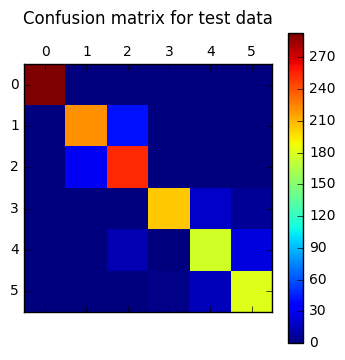

In [8]:
import pylab as pl
pl.matshow(test_cm)
pl.title('Confusion matrix for test data\n'
         + '                               ')
pl.colorbar()
pl.show()

In [11]:
# compute a number of other common measures of prediction goodness

We now compute some commonly used measures of prediction "goodness".  
For more detail on these measures see
[6],[7],[8],[9]

In [9]:
# Accuracy how many do you have the right result
print("Accuracy = %f" %(skm.accuracy_score(test_truth,test_pred)))

Accuracy = 0.895623


In [10]:
# Precision
print("Precision = %f" %(skm.precision_score(test_truth,test_pred)))

Precision = 0.898132


/Users/chen/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


In [11]:
# Recall
print("Recall = %f" %(skm.recall_score(test_truth,test_pred)))

Recall = 0.895623


/Users/chen/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


In [12]:
# F1 Score Good score
print("F1 score = %f" %(skm.f1_score(test_truth,test_pred)))

F1 score = 0.896058


/Users/chen/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


## Conclusions

We can make the following concrete conclusions looking at the above results.

Random Forests give us satisfactory error rates and predictive power in this scenario.

￼Using domain knowledge it is possible to get surprisingly high values of predictive measures, and low error rates on validation and test sets.  

This is supported by the results, i.e. ~90% on predictive measures, OOB error estimates ~2%.

We only did this once and did not go back and forth tweaking the models.  Note that we stuck to the rules here and did not see the test set until we were done modeling.

Focusing on magnitude and angle information for acceleration and jerk in the time and frequency domains gives us a model with surprising predictive power.  It's possible that a brute force model will give better predictive power but it would simply show us how to blindly apply software.  If for some reason the model misbehaved or failed, we would not have any insight at all as to why.  Instead we used domain knowledge to focus on insight and in the process created a model with interpretive value.

Model performance on the test set is better than on the validation set as seen in the two “Total” rows above and each individual activity.

Let's see how we might be able to improve the model in future.  It's always good to note the possible ways in which our model(s) might be deficient or incomplete or unfinished so we don't get overconfident about our models and overpromise what they can do.

### Critique

* Our model eliminated a number of Magnitude related attributes such as -mad, -max, -min also a number of Gyro related variables during the variable selection process using domain knowledge. These may be important but this was not tested.  We may want to look at that the next time we do this.

* Variable importance should be investigated in detail - i.e. we really ought to look at how we can use the smaller number of attributes identified as important, to create the model and see what the difference is. Computationally this would be more efficient. We could even use simpler methods like Logistic Regression to do the classification from that point on, using only the reduced set of variables.

### Exercise

Instead of using domain knowledge to reduce variables, use Random Forests directly on the full set of columns.  Then use variable importance and sort the variables.  

Compare the model you get with the model you got from using domain knowledge.  
You can short circuit the data cleanup process as well by simply renaming the variables x1, x2...xn, y where y is 'activity' the dependent variable.  

Now look at the new Random Forest model you get.  It is likely to be more accurate at prediction than the one we have above. It is a black box model, where there is no meaning attached to the variables.  
          
* What insights does it give you?  
* Which model do you prefer?  
* Why?  
* Is this an absolute preference or might it change?  
* What might cause it to change? 

## References

[1] Original dataset as R data https://spark-public.s3.amazonaws.com/dataanalysis/samsungData.rda  
[2] Human Activity Recognition Using Smartphones http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones  
[3] Android Developer Reference http://developer.android.com/reference/android/hardware/Sensor.html  
[4] Random Forests http://en.wikipedia.org/wiki/Random_forest  
[5] Confusion matrix http://en.wikipedia.org/wiki/Confusion_matrix
[6] Mean Accuracy http://ieeexplore.ieee.org/xpl/login.jsp?tp=&arnumber=1054102&url=http%3A%2F%2Fieeexplore.ieee.org%2Fxpls%2Fabs_all.jsp%3Farnumber%3D1054102

[7] Precision http://en.wikipedia.org/wiki/Precision_and_recall
[8] Recall http://en.wikipedia.org/wiki/Precision_and_recall
[9] F Measure http://en.wikipedia.org/wiki/Precision_and_recall

In [16]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()